In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
Utrecht = pd.read_csv('Utrecht.csv', encoding='utf-8')
print( Utrecht )

     tomt  bo_yta  balkong    ar  pris
0    55.6   93.60        0  1935   568
1   115.3  111.60        1  1927   649
2    66.0  117.00        0  1941   716
3   102.1  141.75        1  1940   825
4   142.6  182.25        1  1960  1015
..    ...     ...      ...   ...   ...
95  119.9  153.00        1  2004   792
96   73.0   98.55        0  2007   497
97   90.3  154.80        1  1958   908
98  131.9  196.20        1  1956  1198
99  131.4  156.60        1  1964   924

[100 rows x 5 columns]


In [3]:
print(Utrecht[Utrecht['balkong']==1]['pris'].describe())
print(Utrecht[Utrecht['balkong']==0]['pris'].describe())

count      81.000000
mean      801.222222
std       185.715845
min       440.000000
25%       671.000000
50%       792.000000
75%       908.000000
max      1339.000000
Name: pris, dtype: float64
count      19.000000
mean      701.736842
std       177.449787
min       466.000000
25%       534.000000
50%       706.000000
75%       790.500000
max      1070.000000
Name: pris, dtype: float64


Adj. R-squared blir sämre om vi tränar med 90 datapunkter jämfört med 80
Vidare förbättrar inte balkong prediktionen, dessutom är 0 inom balkongkoefficientens konfidensintervall

In [ ]:

#Enkel regression av pris
res = smf.ols(formula='pris~bo_yta+ar+tomt',data=Utrecht[:80])
Utrecht['res'] = res.fit().resid
model =res.fit()
Utrecht['res'] = Utrecht['pris'] - model.predict(Utrecht)
res.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     840.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.60e-58
Time:                        10:56:53   Log-Likelihood:                -391.49
No. Observations:                  80   AIC:                             791.0
Df Residuals:                      76   BIC:                             800.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3058.3470    298.605     10.242      0.000    2463.623    3653.071
bo_yta         4.9070      0.124     39.691      0.000       4.661       5.153
ar            -1.5383      0.155     -9.919      0.000      -1.847      -1.229
tomt           0.6831      0.149      4.590      0.000       0.387       0.979
==============================================================================
Omnibus:                        1.777   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.489
Skew:                          -0.334   Prob(JB):                        0.475
Kurtosis:                       2.995   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

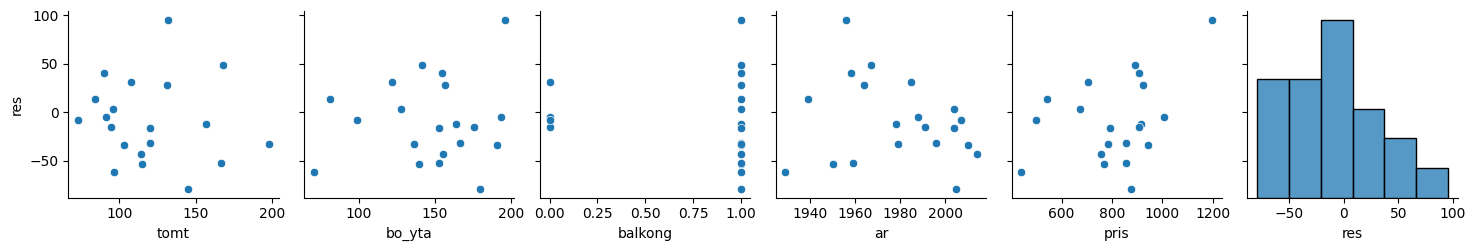

In [ ]:
#Visar residualer för vår modell med testdata
sns.pairplot(Utrecht[80:],y_vars='res')

In [44]:
Utrecht.describe()

,tomt,bo_yta,balkong,ar,pris,res
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,112.783000,138.240000,0.810000,1969.460000,782.320000,-1.826556
std,31.858304,37.396767,0.394277,26.554469,187.442699,34.782480
min,54.500000,68.850000,0.000000,1926.000000,440.000000,-79.872251
25%,89.650000,109.350000,1.000000,1946.250000,653.500000,-17.313327
50%,109.400000,137.475000,1.000000,1967.000000,770.500000,0.920159
75%,132.125000,162.450000,1.000000,1991.000000,893.500000,21.035756
max,198.400000,245.250000,1.000000,2017.000000,1339.000000,95.677809
